### Import Data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('USA_cars_datasets.csv')

### Explor Data

In [3]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
df.shape

(2499, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [6]:
df['year'].dtype

dtype('int64')

In [7]:
df.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [8]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [9]:
df.nunique()

Unnamed: 0      2499
price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64

In [10]:
df['country'].unique()

array([' usa', ' canada'], dtype=object)

### Cleaning and adjusting data

In [11]:
df[df.isna().any(axis=1)]

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition


In [12]:
df =df.dropna(how='all')

In [13]:
# Changing Datatype of column
df['color'] = df['color'].astype('O')

In [14]:
# Create a sub dataframe
cars = df.drop(['Unnamed: 0','vin','lot'],axis=1)
cars.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [15]:
# Creating new column showing age of car
cars['Age'] = 2022 - cars['year']

### Relationship between data

In [16]:
correlation = cars[['price','mileage','Age']].corr()
correlation

,price,mileage,Age
price,1.000000,-0.400838,-0.418274
mileage,-0.400838,1.000000,0.594686
Age,-0.418274,0.594686,1.000000


<AxesSubplot:>

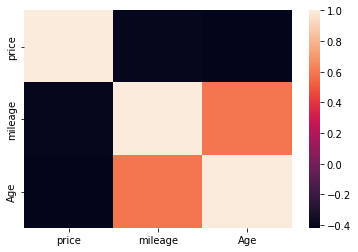

In [17]:
sns.heatmap(correlation)

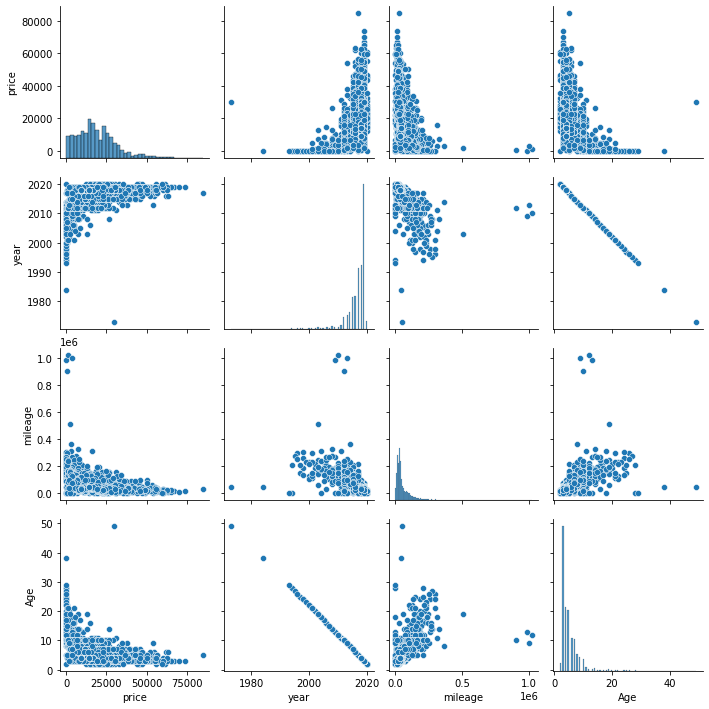

In [18]:
sns.pairplot(cars)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

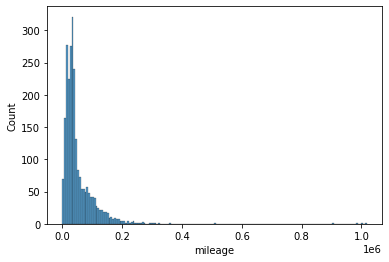

In [19]:
sns.histplot(cars['mileage'])

In [20]:
cars[cars['mileage'] == cars['mileage'].max()]

,price,brand,model,year,title_status,mileage,color,state,country,condition,Age
528,1025,peterbilt,truck,2010,salvage insurance,1017936.0,color:,georgia,usa,17 hours left,12


In [21]:
count_by_brand_obj = {"brand":[], 'count':[]}

for i in cars['brand'].unique():
    temp = cars[cars['brand']== i]
    count_by_brand_obj['brand'].append(i)
    count_by_brand_obj['count'].append(len(temp))

count_by_brand = pd.DataFrame(count_by_brand_obj)
count_by_brand.sort_values(by='count',ascending=False)
    

,brand,count
1,ford,1235
2,dodge,432
23,nissan,312
3,chevrolet,297
4,gmc,42
10,jeep,30
5,chrysler,18
11,bmw,17
13,hyundai,15
6,kia,13


<AxesSubplot:xlabel='price', ylabel='Age'>

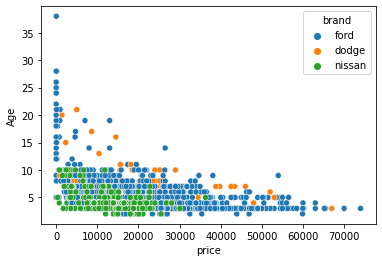

In [22]:
top3_corr = cars[cars['brand'].isin(['ford','nissan','dodge'])]
sns.scatterplot(x=top3_corr['price'],y=top3_corr["Age"],hue=top3_corr['brand'])

<AxesSubplot:xlabel='Age', ylabel='mileage'>

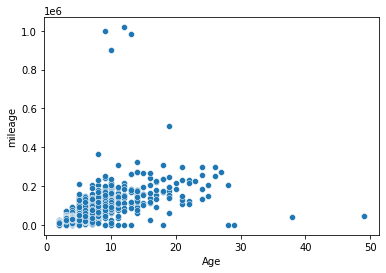

In [23]:
sns.scatterplot(x=cars['Age'], y=cars['mileage'])

In [24]:
top3_info=top3_corr.groupby('brand').mean()

<AxesSubplot:>

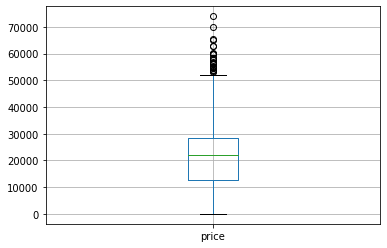

In [25]:
cars[cars['brand'].isin(['ford']) ].boxplot('price')

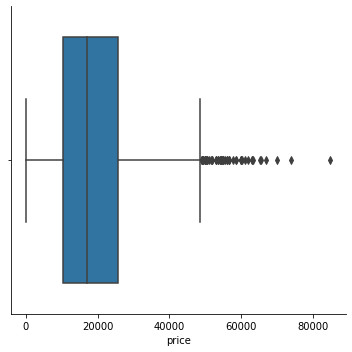

In [26]:
sns.catplot(x='price', data=cars, kind='box')

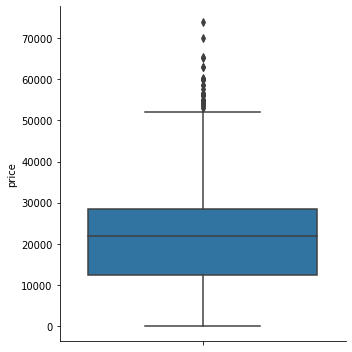

In [27]:
temp=cars[cars['brand']=='ford']
sns.catplot(y='price', data=temp, kind='box')

In [28]:
temp['price'].describe()

count     1235.000000
mean     21666.888259
std      12945.547175
min          0.000000
25%      12530.000000
50%      22000.000000
75%      28500.000000
max      74000.000000
Name: price, dtype: float64

ford
dodge
nissan


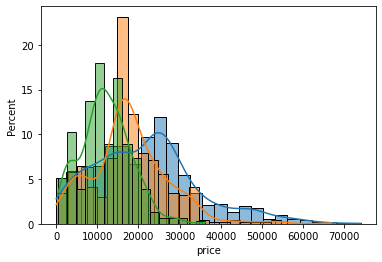

In [39]:
for i in top3_corr['brand'].unique():
    selected = cars[cars['brand'] == i]
    print(i)
    sns.histplot(selected['price'], kde=True,stat='percent')

In [ ]:
relative 

In [30]:
cars[(cars['brand']=='ford') & (cars['price']==0) & (cars['title status'] != 'salvage insurance')]

KeyError: 'title status'